In [1]:
import pandas as pd
train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')
train_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
2,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
3,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
4,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = [1,2,3,4,5]
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for params in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=params, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

mse_values
    

[26383.244596131968,
 15152.847554038681,
 14668.32890911389,
 16079.745093856654,
 14233.643139931741]

In [3]:
hyper_params = list(range(1,21))
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for params in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=params, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

mse_values

[26383.244596131968,
 15152.847554038681,
 14668.32890911389,
 16079.745093856654,
 14233.643139931741,
 13781.359025407659,
 13932.903995727982,
 14015.416293373151,
 14040.643997808958,
 14214.452400455062,
 14323.282373847065,
 14588.854711793701,
 14576.310270546817,
 14573.683493533936,
 14642.491240045507,
 14687.59449214306,
 14719.012451236267,
 14725.675413278275,
 14780.722616672812,
 14755.384158134244]

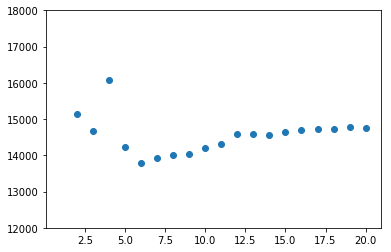

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
plt.scatter(hyper_params, mse_values)
ax.set_ylim(12000,18000)
plt.show()

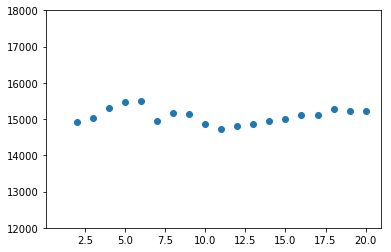

[23287.323094425483,
 14911.47866894198,
 15030.412210845656,
 15307.588026166099,
 15457.750625711034,
 15488.90105549235,
 14957.502240486639,
 15170.441179607509,
 15135.56882821388,
 14862.348794084186,
 14735.774508974324,
 14808.085174124637,
 14869.603159857559,
 14958.641417659213,
 14992.574956389835,
 15100.161964945961,
 15116.662867917696,
 15280.096799112347,
 15220.885695467336,
 15227.097354948808]

In [12]:
hyper_params = [x for x in range(1,21)]
mse_values = list()

features=['accommodates', 'bedrooms', 'bathrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews']

for params in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=params, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

fig,ax = plt.subplots()
plt.scatter(hyper_params, mse_values)
ax.set_ylim(12000,18000)
plt.show()
mse_values

In [19]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()
import sys
def feature_selection(features, dict_mse, list_mse):
    lowest_mse = float('inf')
    lowest_k = 0
    for param in hyper_params:
        knn = KNeighborsRegressor(n_neighbors=param, algorithm='brute')
        knn.fit(train_df[features], train_df['price'])
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df['price'], predictions)
        list_mse.append(mse)
        if mse < lowest_mse:
            lowest_mse = mse
            lowest_k = param
    dict_mse[lowest_k] = lowest_mse

feature_selection(two_features,two_hyp_mse,two_mse_values)
print(two_hyp_mse)
feature_selection(three_features,three_hyp_mse,three_mse_values)
print(three_hyp_mse)

{5: 14875.319590443689}
{5: 13494.16850967008}


In [20]:
three_mse_values

[25421.623435722413,
 19769.774459613196,
 15508.05498672734,
 14341.235565984072,
 13494.16850967008,
 13724.246618632282,
 13771.640082654223,
 14006.831733503981,
 14259.153246534363,
 14249.125938566553,
 14300.664466570764,
 14339.878484072808,
 14468.690449744532,
 14592.024157785982,
 14802.503991909996,
 14886.224180531854,
 14974.477933795484,
 15007.806510625151,
 15121.674935947736,
 15107.282838452787]